##### Scope
Gather data from various files to preparare it for supervised learning techniques modeling to predict cancelations.The files contain past three months of customer data which includes subscription and listening history from a streaming platform.

Target extract:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

## 1. Gathering Data

##### 1.1. Read the following Customer data and Listing history

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading-in the customer data
maven_music_customers = pd.read_csv('../Data/maven_music_customers.csv')
maven_music_customers

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,3/20/23,NaN,$2.99,NaN,6/3/23
6,5581,Reed Sharp,Email: sharp.tunes@email.com,3/21/23,Premium (No Ads),$9.99,NaN,NaN
7,5759,Carol Kingbird,Email: songbird.carol@email.com,3/22/23,Premium (No Ads),$9.99,NaN,6/2/23
8,5761,Sonata Nash,Email: musical.sonata@email.com,3/28/23,Premium (No Ads),$9.99,NaN,NaN
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,3/28/23,Basic (Ads),$2.99,NaN,NaN


In [3]:
# Reading-in the listening history
maven_music_listening_history = pd.read_excel('../Data/maven_music_listening_history.xlsx')
maven_music_listening_history

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song
...,...,...,...,...,...
500,7579,111282,4,111,Song
501,6588,111286,1,201,Podcast
502,5763,111333,1,110,Song
503,5763,111333,2,108,Song


In [4]:
# Reading-in the audio data
audio_data = pd.read_excel('../Data/maven_music_listening_history.xlsx', sheet_name=1)
audio_data

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52
5,Song-106,My Old Dog and My True Love,Country,23
6,Song-107,Dirt Road Romance,Country,30
7,Song-108,Chase the Dream,Hip Hop,4
8,Song-109,Rise Above,Hip Hop,9
9,Song-110,Boss Moves,Hip Hop,28


In [5]:
# Reading-in the session data
session_data = pd.read_excel('../Data/maven_music_listening_history.xlsx', sheet_name=2)
session_data

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00
...,...,...
85,111263,2023-05-20 15:17:30
86,111273,2023-05-20 16:01:00
87,111282,2023-05-23 23:51:00
88,111286,2023-05-27 02:15:00


## 2. Clean Data

##### 2.1. Convert Data Types

In [6]:
# Checking the data types
maven_music_customers

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,3/20/23,NaN,$2.99,NaN,6/3/23
6,5581,Reed Sharp,Email: sharp.tunes@email.com,3/21/23,Premium (No Ads),$9.99,NaN,NaN
7,5759,Carol Kingbird,Email: songbird.carol@email.com,3/22/23,Premium (No Ads),$9.99,NaN,6/2/23
8,5761,Sonata Nash,Email: musical.sonata@email.com,3/28/23,Premium (No Ads),$9.99,NaN,NaN
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,3/28/23,Basic (Ads),$2.99,NaN,NaN


In [7]:
maven_music_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer ID        30 non-null     int64 
 1   Customer Name      30 non-null     object
 2   Email              30 non-null     object
 3   Member Since       30 non-null     object
 4   Subscription Plan  25 non-null     object
 5   Subscription Rate  30 non-null     object
 6   Discount?          7 non-null      object
 7   Cancellation Date  13 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


In [8]:
# Converting objects to numeric and datetime fields
maven_music_customers['Subscription Rate'] = maven_music_customers['Subscription Rate'].str.replace('$', '').str.strip()
maven_music_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer ID        30 non-null     int64 
 1   Customer Name      30 non-null     object
 2   Email              30 non-null     object
 3   Member Since       30 non-null     object
 4   Subscription Plan  25 non-null     object
 5   Subscription Rate  30 non-null     object
 6   Discount?          7 non-null      object
 7   Cancellation Date  13 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


In [9]:
maven_music_customers = (maven_music_customers.astype({'Subscription Rate': 'float32', 
                                                       'Member Since': 'datetime64[ns]', 
                                                       'Cancellation Date': 'datetime64[ns]'}))

maven_music_customers['Subscription Rate'] = maven_music_customers['Subscription Rate'].round(2)

maven_music_customers.head(5)

C:\Users\jpopl\AppData\Local\Temp\ipykernel_8920\3157416199.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  maven_music_customers = (maven_music_customers.astype({'Subscription Rate': 'float32',
C:\Users\jpopl\AppData\Local\Temp\ipykernel_8920\3157416199.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  maven_music_customers = (maven_music_customers.astype({'Subscription Rate': 'float32',


,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT


In [10]:
audio_data

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52
5,Song-106,My Old Dog and My True Love,Country,23
6,Song-107,Dirt Road Romance,Country,30
7,Song-108,Chase the Dream,Hip Hop,4
8,Song-109,Rise Above,Hip Hop,9
9,Song-110,Boss Moves,Hip Hop,28


In [11]:
audio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 676.0+ bytes


In [12]:
session_data

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00
...,...,...
85,111263,2023-05-20 15:17:30
86,111273,2023-05-20 16:01:00
87,111282,2023-05-23 23:51:00
88,111286,2023-05-27 02:15:00


In [13]:
session_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


### 2.2. Resolve Data Issues

#### 2.2.1. Missing Data

In [14]:
# Looking for NaN values in the data
maven_music_customers['Subscription Plan'] = np.where(((maven_music_customers['Subscription Plan'].isna()) 
                                                      & (maven_music_customers['Subscription Rate'] == 2.99)), 
                                                      'Basic (Ads)', maven_music_customers['Subscription Plan'])

In [15]:
maven_music_customers['Subscription Plan']

0          Basic (Ads)
1          Basic (Ads)
2          Basic (Ads)
3          Basic (Ads)
4          Basic (Ads)
5          Basic (Ads)
6     Premium (No Ads)
7     Premium (No Ads)
8     Premium (No Ads)
9          Basic (Ads)
10         Basic (Ads)
11         Basic (Ads)
12    Premium (No Ads)
13         Basic (Ads)
14    Premium (No Ads)
15    Premium (No Ads)
16         Basic (Ads)
17         Basic (Ads)
18         Basic (Ads)
19         Basic (Ads)
20         Basic (Ads)
21    Premium (No Ads)
22    Premium (No Ads)
23    Premium (No Ads)
24         Basic (Ads)
25    Premium (No Ads)
26    Premium (No Ads)
27         Basic (Ads)
28    Premium (No Ads)
29    Premium (No Ads)
Name: Subscription Plan, dtype: object

In [16]:
maven_music_customers = maven_music_customers.rename(columns={"Discount?": "Discount"}) 
maven_music_customers['Discount'] = np.where(maven_music_customers['Discount'].isna(), 0, 1)


In [17]:
maven_music_customers['Is Member'] = np.where(maven_music_customers['Cancellation Date'].isna(), 1, 0)
maven_music_customers

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date,Is Member
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.990000,0,NaT,1
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.990000,0,NaT,1
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.990000,0,2023-06-01,0
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.990000,0,NaT,1
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.990000,0,NaT,1
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,Basic (Ads),2.990000,0,2023-06-03,0
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.990000,0,NaT,1
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.990000,0,2023-06-02,0
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.990000,0,NaT,1
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.990000,0,NaT,1


In [18]:
maven_music_customers['Email'] = maven_music_customers['Email'].str.replace('Email: ', '')

In [19]:
maven_music_customers

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date,Is Member
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.990000,0,NaT,1
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.990000,0,NaT,1
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.990000,0,2023-06-01,0
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.990000,0,NaT,1
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.990000,0,NaT,1
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.990000,0,2023-06-03,0
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.990000,0,NaT,1
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.990000,0,2023-06-02,0
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium (No Ads),9.990000,0,NaT,1
9,5763,Jazz Coleman,coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.990000,0,NaT,1


#### 2.2.2. Inconsistent Text & Typos

In [20]:
# Checking for inconsistent text & typos
maven_music_customers['Subscription Rate'] = np.where(maven_music_customers['Subscription Rate'] > 99, 
                                                      9.99, maven_music_customers['Subscription Rate'])

In [21]:
maven_music_customers

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date,Is Member
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,1
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,1
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,0
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,1
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,1
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,0
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT,1
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,0
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT,1
9,5763,Jazz Coleman,coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,0,NaT,1


In [22]:
audio_data['Genre']

0            Pop
1            Pop
2      Pop Music
3      Pop Music
4      Pop Music
5        Country
6        Country
7        Hip Hop
8        Hip Hop
9        Hip Hop
10          Jazz
11          Jazz
12        Comedy
13        Comedy
14        Comedy
15    True Crime
16    True Crime
Name: Genre, dtype: object

In [23]:
audio_data['Genre'] = np.where(audio_data['Genre'] == 'Pop Music', 'Pop', audio_data['Genre'])

In [24]:
session_data.isna().sum()

Session ID             0
Session Log In Time    0
dtype: int64

#### 2.2.3. Duplicate Rows

In [25]:
# Checking for duplicate rows
maven_music_customers.duplicated().sum()

0

In [26]:
audio_data.duplicated().sum()

0

In [27]:
audio_data.sort_values('Popularity')

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
12,Podcast-201,Jokes on Jokes,Comedy,2
15,Podcast-204,Crime Chronicles,True Crime,4
7,Song-108,Chase the Dream,Hip Hop,4
2,Song-103,Sunset Boulevard,Pop,5
13,Podcast-202,Laugh Out Loudcast,Comedy,8
8,Song-109,Rise Above,Hip Hop,9
3,Song-104,Glowing Hearts,Pop,10
16,Podcast-205,Investigating Darkness,True Crime,17


In [28]:
session_data.duplicated().sum()

0

#### 2.2.4. Outliers

In [29]:
# Checking for outliers
maven_music_customers.describe()

,Customer ID,Member Since,Subscription Rate,Discount,Cancellation Date,Is Member
count,30.000000,30,30.000000,30.000000,13,30.000000
mean,6276.333333,2023-04-10 06:24:00,5.556668,0.233333,2023-06-01 16:36:55.384615424,0.566667
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000,2023-06-01 00:00:00,0.000000
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000,2023-06-01 00:00:00,0.000000
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000,2023-06-02 00:00:00,1.000000
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000,2023-06-02 00:00:00,1.000000
max,7583.000000,2023-05-16 00:00:00,9.990000,1.000000,2023-06-03 00:00:00,1.000000
std,814.255587,NaN,3.058998,0.430183,NaN,0.504007


In [30]:
audio_data.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


### 2.3. Creating New Columns

In [31]:
# Creating a 'Cancelled' column
maven_music_customers['Is Member']

0     1
1     1
2     0
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    0
13    0
14    1
15    0
16    1
17    1
18    1
19    0
20    1
21    1
22    0
23    0
24    1
25    0
26    0
27    1
28    0
29    0
Name: Is Member, dtype: int32

In [32]:
# Creating an updated 'Email' column without the Email: portion
maven_music_customers['Email']

0       harmonious.vibes@email.com
1         melodious.aria@email.edu
2       rhythmical.lyric@email.com
3            groovy.rock@email.com
4        beats.by.rhythm@email.edu
5              jazzy.sax@email.com
6            sharp.tunes@email.com
7         songbird.carol@email.com
8         musical.sonata@email.com
9     coleman.jazzmaster@email.com
10        harmonic.chord@email.com
11     rhythmic.franklin@email.edu
12     campbell.chordify@email.com
13        rhythmic.benny@email.com
14      park.of.melodies@email.com
15       rhodes.symphony@email.com
16     beats.by.beatrice@email.com
17     bass.master.bobby@email.edu
18      lyrical.saunders@email.edu
19          bass.harmony@email.com
20            flat.tunes@email.edu
21       kiki.keys.piano@email.com
22          groovy.greta@email.com
23     heartfelt.harmony@email.com
24       wallace.harmony@email.com
25     fitzgerald.melody@email.com
26     murphy.reed.music@email.com
27         drumming.jazz@email.com
28           keysofl

## 2.4. EDA

In [33]:
# How long were customers members before they cancelled.
maven_music_customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date,Is Member
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,1
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,1
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,0
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,1
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,1


In [34]:
maven_music_customers['Days Before Cancellation'] = (maven_music_customers['Cancellation Date'] 
                                                     - maven_music_customers['Member Since'])
maven_music_customers['Days Before Cancellation'] = maven_music_customers['Days Before Cancellation'].dt.days.astype('float32')

In [35]:
maven_music_customers['Days Before Cancellation'].mean()

46.307693

In [36]:
maven_music_customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date,Is Member,Days Before Cancellation
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,1,NaN
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,1,NaN
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,0,80.0
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,1,NaN
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,1,NaN


In [37]:
# Cancellation rate for those who had a discount
maven_music_customers['Cancelled Discounted Member'] = np.where(((maven_music_customers['Discount'] == 1) & 
                                                                 (maven_music_customers['Is Member'] == 0)), 
                                                                1, 0)


cancellation_rate_discounted = (maven_music_customers['Cancelled Discounted Member'].sum() / 
                                maven_music_customers['Customer ID'][(maven_music_customers['Discount'] == 1)].count())

cancellation_rate_discounted

0.8571428571428571

In [38]:
# Cancellation rate for those who did not have a discount
maven_music_customers['Cancelled Non-Discounted Member'] = np.where(((maven_music_customers['Discount'] == 0) & 
                                                                 (maven_music_customers['Is Member'] == 0)), 
                                                                1, 0)
cancellation_rate_non_discounted = (maven_music_customers['Cancelled Non-Discounted Member'].sum() / 
                                    maven_music_customers['Customer ID'][(maven_music_customers['Discount'] == 0)].count())

cancellation_rate_non_discounted

0.30434782608695654

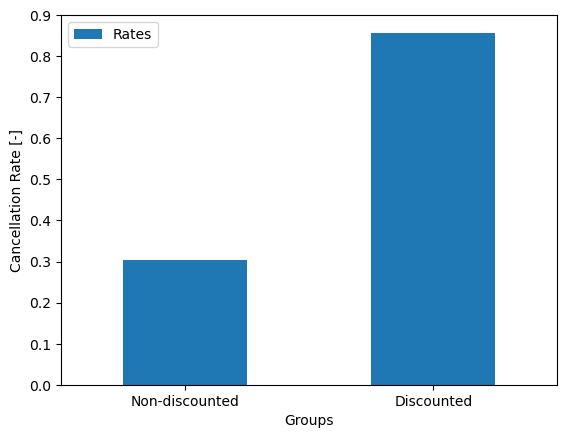

In [39]:
# Visualize the cancellation rate for those with a discount vs those without a discount
plot_data_frame = pd.DataFrame({'Groups': ['Non-discounted', 'Discounted'], 
                               'Rates': [cancellation_rate_non_discounted, cancellation_rate_discounted]}) 

plot_data_frame.plot.bar(x='Groups', y='Rates', rot=0, ylabel='Cancellation Rate [-]');

In [40]:
# Splitting the ID in the audio data so the column can be joined with other tables
audio_data

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop,5
3,Song-104,Glowing Hearts,Pop,10
4,Song-105,Pop Rocks,Pop,52
5,Song-106,My Old Dog and My True Love,Country,23
6,Song-107,Dirt Road Romance,Country,30
7,Song-108,Chase the Dream,Hip Hop,4
8,Song-109,Rise Above,Hip Hop,9
9,Song-110,Boss Moves,Hip Hop,28


In [41]:
maven_music_listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [42]:
audio_data[['Type', 'ID']] = audio_data['ID'].str.split('-', expand=True)

In [43]:
audio_data

,ID,Name,Genre,Popularity,Type
0,101,Dance All Night,Pop,1,Song
1,102,Unbreakable Beat,Pop,2,Song
2,103,Sunset Boulevard,Pop,5,Song
3,104,Glowing Hearts,Pop,10,Song
4,105,Pop Rocks,Pop,52,Song
5,106,My Old Dog and My True Love,Country,23,Song
6,107,Dirt Road Romance,Country,30,Song
7,108,Chase the Dream,Hip Hop,4,Song
8,109,Rise Above,Hip Hop,9,Song
9,110,Boss Moves,Hip Hop,28,Song


In [44]:
# Checking the data type of Audio ID in the audio table
audio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
 4   Type        17 non-null     object
dtypes: int64(1), object(4)
memory usage: 812.0+ bytes


In [45]:
audio_data = audio_data.astype({'ID': 'int64'})

In [46]:
audio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     int64 
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
 4   Type        17 non-null     object
dtypes: int64(2), object(3)
memory usage: 812.0+ bytes


In [47]:
# The number of listening sessions that each customer had
maven_music_listening_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [48]:
maven_music_listening_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [49]:
session_data.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [50]:
session_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [51]:
session_analysis = maven_music_listening_history.merge(session_data, how='left', on='Session ID')

In [52]:
session_analysis['Session Log In Time'].describe()

count                              505
mean     2023-04-23 16:00:16.336633600
min                2023-03-13 14:14:00
25%                2023-03-29 08:50:00
50%                2023-05-01 10:12:00
75%                2023-05-16 19:15:00
max                2023-05-31 06:03:00
Name: Session Log In Time, dtype: object

In [53]:
session_count = (session_analysis[['Customer ID', 'Session ID']])
session_count = session_count.drop_duplicates(keep='first').reset_index(drop=True)

In [54]:
session_count = session_count.groupby('Customer ID').count().rename(columns={'Session ID': 'Session Count'}).reset_index()

In [55]:
session_count.describe()

,Customer ID,Session Count
count,30.000000,30.000000
mean,6276.333333,3.000000
std,814.255587,1.640017
min,5001.000000,1.000000
25%,5759.500000,2.000000
50%,6196.000000,3.000000
75%,6823.500000,3.000000
max,7583.000000,8.000000


In [56]:
session_analysis = session_analysis.merge(session_count, how='left', on='Customer ID')

In [57]:
# Number of sessions per Customer
session_analysis = (session_analysis.merge(audio_data, how='left', left_on='Audio ID', right_on='ID')
                    .drop(columns=['ID']))

In [58]:
# The most popular genres that customers listened to
popular_genres = session_analysis.groupby(['Audio Type', 'Genre']).count()
popular_genres = popular_genres['Customer ID'].reset_index()

In [59]:
popular_genres = (popular_genres.rename(columns={'Customer ID': 'Count'})
                  .sort_values('Count', ascending=False).reset_index(drop=True))
popular_genres

,Audio Type,Genre,Count
0,Song,Pop,259
1,Song,Hip Hop,88
2,Song,Country,68
3,Song,Jazz,48
4,Podcast,Comedy,19
5,Podcast,True Crime,15
6,Podcast,Pop,8


## 3. Prep for Modeling

In [60]:
podcast_number = pd.get_dummies(session_analysis[['Customer ID', 'Session ID', 'Type']], dtype='int')

In [61]:
podcast_number

,Customer ID,Session ID,Type_Podcast,Type_Song
0,5001,100520,0,1
1,5001,100520,0,1
2,5001,100520,0,1
3,5001,100520,0,1
4,5001,100520,0,1
...,...,...,...,...
500,7579,111282,0,1
501,6588,111286,1,0
502,5763,111333,0,1
503,5763,111333,0,1


In [62]:
session_analysis.describe()

,Customer ID,Session ID,Audio Order,Audio ID,Session Log In Time,Session Count,Popularity
count,505.000000,505.000000,505.000000,505.000000,505,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366,2023-04-23 16:00:16.336633600,3.966337,20.621782
min,5001.000000,100520.000000,1.000000,101.000000,2023-03-13 14:14:00,1.000000,1.000000
25%,5267.000000,101925.000000,2.000000,103.000000,2023-03-29 08:50:00,2.000000,4.000000
50%,6029.000000,105116.000000,4.000000,105.000000,2023-05-01 10:12:00,3.000000,10.000000
75%,6822.000000,109654.000000,6.000000,109.000000,2023-05-16 19:15:00,6.000000,30.000000
max,7583.000000,111333.000000,15.000000,205.000000,2023-05-31 06:03:00,8.000000,80.000000
std,832.861221,3625.879577,2.669008,24.670285,NaN,2.165947,22.278841


In [63]:
podcast_number = (podcast_number[['Customer ID', 'Session ID', 'Type_Podcast']]
                  .rename(columns={'Type_Podcast': 'Podcast Listened'}))

In [64]:
session_analysis = session_analysis.merge(podcast_number[['Podcast Listened']], 
                                          how='left', 
                                          left_index=True, 
                                          right_index=True)

In [65]:
pop_number = pd.get_dummies(session_analysis[['Customer ID', 'Session ID', 'Genre']], dtype='int')

In [66]:
pop_number = pop_number[['Customer ID', 'Session ID', 'Genre_Pop']].rename(columns={'Genre_Pop': 'Pop Listened'})

In [67]:
session_analysis = session_analysis.merge(pop_number[['Pop Listened']], 
                                          how='left', 
                                          left_index=True, 
                                          right_index=True)

In [68]:
session_analysis.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Session Log In Time,Session Count,Name,Genre,Popularity,Type,Podcast Listened,Pop Listened
0,5001,100520,1,101,Song,2023-03-13 18:29:00,8,Dance All Night,Pop,1,Song,0,1
1,5001,100520,2,102,Song,2023-03-13 18:29:00,8,Unbreakable Beat,Pop,2,Song,0,1
2,5001,100520,3,103,Song,2023-03-13 18:29:00,8,Sunset Boulevard,Pop,5,Song,0,1
3,5001,100520,4,104,Song,2023-03-13 18:29:00,8,Glowing Hearts,Pop,10,Song,0,1
4,5001,100520,5,105,Song,2023-03-13 18:29:00,8,Pop Rocks,Pop,52,Song,0,1


In [69]:
listening_habits = (session_analysis.groupby(['Customer ID', 'Session ID'])
                                    .agg({'Session Count': 'mean', 'Podcast Listened': 'sum', 'Pop Listened': 'sum'})
                                    .reset_index())

In [70]:
listening_habits['Podcast Listened'] = np.where(listening_habits['Podcast Listened'] > 0, 1, 0)

In [71]:
listening_habits['Pop Listened'] = np.where(listening_habits['Pop Listened'] > 0, 1, 0)

In [72]:
listening_habits = (listening_habits.groupby(['Customer ID'])
                                    .agg({'Session Count': 'mean', 'Podcast Listened': 'sum', 'Pop Listened': 'sum'})
                                    .reset_index())

In [73]:
listening_habits['Pop Listened Percent'] = 100 * listening_habits['Pop Listened'] / listening_habits['Session Count']

In [74]:
listening_habits['Podcast Listened Percent'] = 100 * listening_habits['Podcast Listened'] / listening_habits['Session Count']

In [75]:
# Percent pop
listening_habits['Pop Listened Percent'] = listening_habits['Pop Listened Percent'].round(2)

In [76]:
# Percent podcasts
listening_habits['Podcast Listened Percent'] = listening_habits['Podcast Listened Percent'].round(2)

In [77]:
listening_habits

,Customer ID,Session Count,Podcast Listened,Pop Listened,Pop Listened Percent,Podcast Listened Percent
0,5001,8.0,0,5,62.50,0.00
1,5002,4.0,0,0,0.00,0.00
2,5004,1.0,0,1,100.00,0.00
3,5267,7.0,0,4,57.14,0.00
4,5338,4.0,0,0,0.00,0.00
5,5404,1.0,0,1,100.00,0.00
6,5581,3.0,3,0,0.00,100.00
7,5759,2.0,0,2,100.00,0.00
8,5761,3.0,3,0,0.00,100.00
9,5763,6.0,0,4,66.67,0.00


In [78]:
maven_music_customers

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount,Cancellation Date,Is Member,Days Before Cancellation,Cancelled Discounted Member,Cancelled Non-Discounted Member
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,1,NaN,0,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,1,NaN,0,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,0,80.0,0,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,1,NaN,0,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,1,NaN,0,0
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,0,75.0,0,1
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT,1,NaN,0,0
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,0,72.0,0,1
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT,1,NaN,0,0
9,5763,Jazz Coleman,coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,0,NaT,1,NaN,0,0


In [79]:
model_table = maven_music_customers.merge(listening_habits[['Customer ID', 
                                                            'Session Count', 
                                                            'Pop Listened Percent', 
                                                            'Podcast Listened Percent']], 
                                                            how='left', 
                                                            on='Customer ID')

#### Final table

In [80]:
# Customer ID
# Whether a customer cancelled or not
# Whether a customer received a discount or not
# The number of listening sessions
# Percent of listening history consisting of Pop
# Percent of listening history consisting of Podcasts
final_model_table = model_table[['Customer ID', 
                                 'Is Member',
                                 'Discount',
                                 'Session Count', 
                                 'Pop Listened Percent', 
                                 'Podcast Listened Percent']]

In [81]:
final_model_table

,Customer ID,Is Member,Discount,Session Count,Pop Listened Percent,Podcast Listened Percent
0,5001,1,0,8.0,62.50,0.00
1,5002,1,0,4.0,0.00,0.00
2,5004,0,0,1.0,100.00,0.00
3,5267,1,0,7.0,57.14,0.00
4,5338,1,0,4.0,0.00,0.00
5,5404,0,0,1.0,100.00,0.00
6,5581,1,0,3.0,0.00,100.00
7,5759,0,0,2.0,100.00,0.00
8,5761,1,0,3.0,0.00,100.00
9,5763,1,0,6.0,66.67,0.00


##### Pairplot and correlation

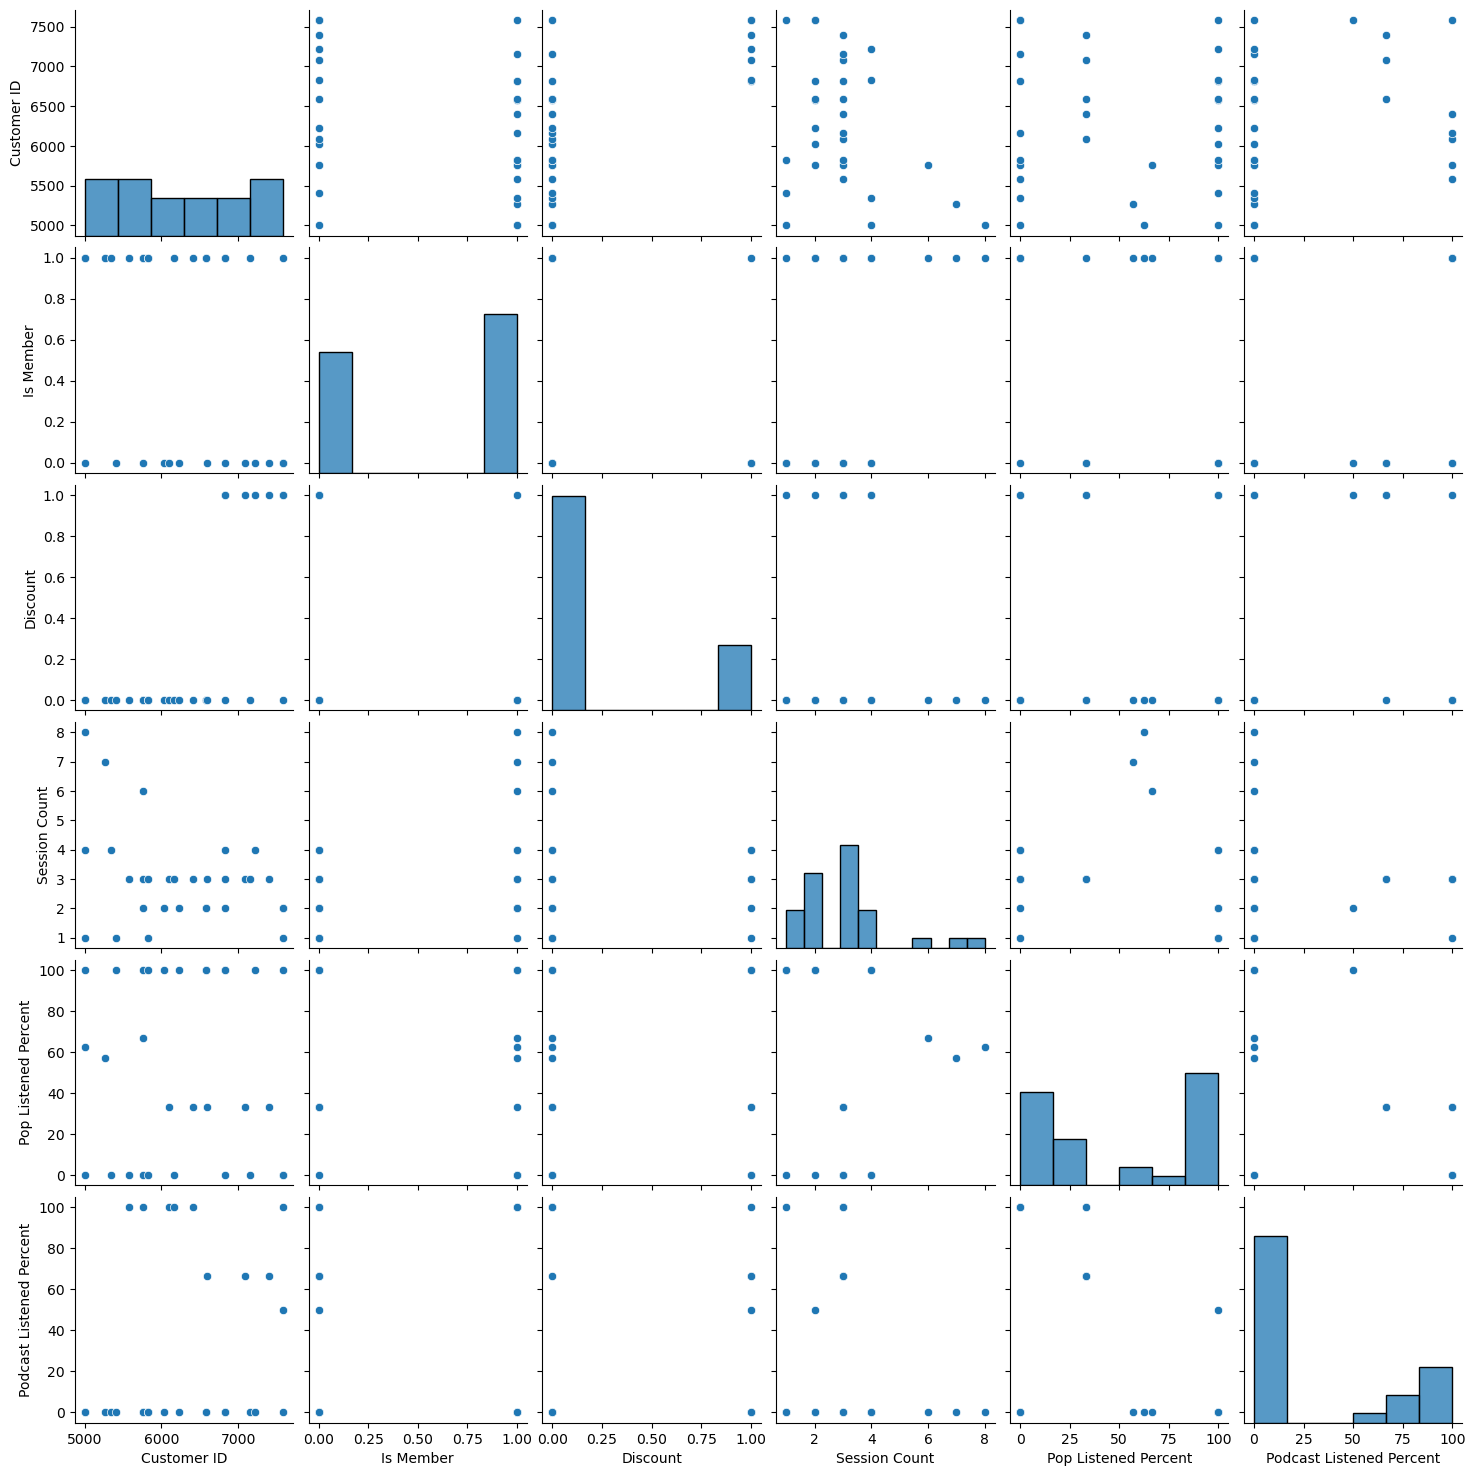

In [82]:
sns.pairplot(final_model_table);

In [83]:
model_corr = final_model_table.corr()

In [84]:
model_corr.style.background_gradient(cmap='coolwarm')

,Customer ID,Is Member,Discount,Session Count,Pop Listened Percent,Podcast Listened Percent
Customer ID,1.000000,-0.269942,0.648514,-0.337083,-0.041091,0.208359
Is Member,-0.269942,1.000000,-0.471825,0.333739,-0.402582,-0.132276
Discount,0.648514,-0.471825,1.000000,-0.048877,0.007794,0.161299
Session Count,-0.337083,0.333739,-0.048877,1.000000,-0.170554,-0.124433
Pop Listened Percent,-0.041091,-0.402582,0.007794,-0.170554,1.000000,-0.473526
Podcast Listened Percent,0.208359,-0.132276,0.161299,-0.124433,-0.473526,1.000000
